Combo ideas:
1. Left hand, right hand, snare, kick
    a) make more variations of this
2. bongo (mixed to one), 


Combos
1. L, R, Both, Flattened
2. L, R, Kick, Snare
3. L, R, Both, Kick
4. L, R, B, HH 

In [23]:
import csv
import os
import note_seq
import numpy as np
import pretty_midi
import pandas as pd
import random
from hvo_sequence import HVO_Sequence
from hvo_sequence.custom_dtypes import Metadata

In [ ]:
from dataset_and_API.src import BongoDrumCollection

collection = BongoDrumCollection('dataset_and_API/data/SavedSessions.bz2')
collection

BongoDrumCollection with 3286 users, total of 6640 attempts

In [22]:
for user_data in collection:
    print(user_data)
    pass

----------------------------------------
User ID: 3119
Number of attempts: 3
User Level of Musical Experience: 5
User Exhibition Rating: 5
Attempt 1:
{'attempt_duration': 9.0, 'self_assessment': 1, 'assessment_time': 12.0, 'attempt_tempo': 122.0, 'drum_path': 'Afrocuban/p0000003354__m001__beat__afrocuban__066---068.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00003119--2023-11-29--14-11-34/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 5}
Attempt 2:
{'attempt_duration': 12.0, 'self_assessment': 5, 'assessment_time': 13.0, 'attempt_tempo': 120.0, 'drum_path': 'Electronic/249_chicago_jackyourbody16.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00003119--2023-11-29--14-11-34/Part2_BongosAlonWithDrums/attempt_003/groove_metadata.json', 'genre': 'Electronic', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 5}

In [14]:
user_data = collection[300]

print(f'user_id: {user_data.user_id}, number_of_attempts: {user_data.number_of_attempts}')

print(f'user_level_of_musical_experience: {user_data.user_level_of_musical_experience}, user_exhibion_rating: {user_data.user_exhibion_rating}') 

user_id: 5364, number_of_attempts: 1
user_level_of_musical_experience: 5, user_exhibion_rating: 3


In [17]:
attempt_1 = user_data.attempts[0]
#attempt_1
#attempt_1.attempt_duration, attempt_1.genre
print(attempt_1)

{'attempt_duration': 18.0, 'self_assessment': 1, 'assessment_time': 22.0, 'attempt_tempo': 110.0, 'drum_path': 'Afrocuban/p0000003389__m001__beat__afrocuban__028---030.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00005364--2023-12-27--17-48-34/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 3}


In [42]:
attempt_1.self_assessment

1

In [22]:
a_1_hvo = attempt_1.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
a_1_hvo.time_signatures
a_1_hvo.tempos

[Tempo = { 
  	 time_step: 0, 
  	 qpm: 110.00011000011
 }]

In [55]:
len(a_1_hvo.hvo)

32

In [3]:
left_hand = 0
right_hand = 0
both = 0
for user in collection:
    for attempt in user.attempts:
        hvo = attempt.load_bongo_loop_hvo_seq()
        hvo.hvo
        for i in range(len(hvo.hvo)):
            if(hvo.hvo[i][0] == 1):
                left_hand += 1
            if(hvo.hvo[i][1] == 1):
                right_hand += 1
            if(hvo.hvo[i][0] == 1 and hvo.hvo[i][1] == 1):
                both += 1


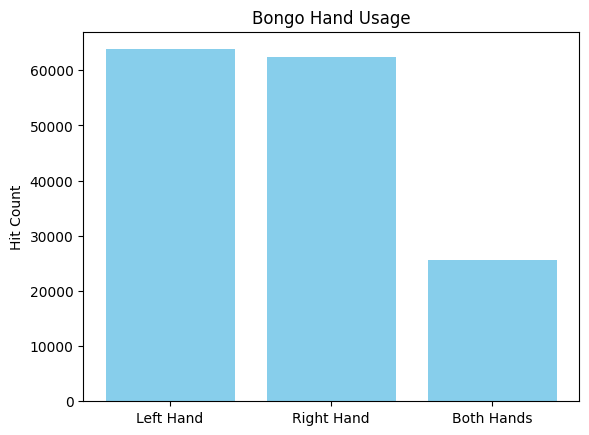

In [4]:
import matplotlib.pyplot as plt

# After your counting loop
labels = ['Left Hand', 'Right Hand', 'Both Hands']
values = [left_hand, right_hand, both]

plt.bar(labels, values, color=['skyblue'])
plt.title('Bongo Hand Usage')
plt.ylabel('Hit Count')
plt.show()

In [8]:
left_hand_all = 0
right_hand_all = 0
both_all = 0
kick_all = 0
snare_all = 0
hh_closed_all = 0
hh_open_all = 0
tom_low_all = 0
tom_mid_all = 0
tom_hi_all = 0
crash_all = 0
ride_all = 0
for user in collection:
    for attempt in user.attempts:
        hvo_full = attempt.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
        
        for i in range(len(hvo.hvo)):
            if(hvo_full.hvo[i][0] == 1):
                left_hand_all += 1
            if(hvo_full.hvo[i][1] == 1):
                right_hand_all += 1
            if(hvo_full.hvo[i][0] == 1 and hvo_full.hvo[i][1] == 1):
                both_all += 1
            if(hvo_full.hvo[i][2] == 1):
                kick_all += 1
            if(hvo_full.hvo[i][3] == 1):
                snare_all += 1
            if(hvo_full.hvo[i][4] == 1):
                hh_closed_all += 1
            if(hvo_full.hvo[i][5] == 1):
                hh_open_all += 1
            if(hvo_full.hvo[i][6] == 1):
                tom_low_all += 1
            if(hvo_full.hvo[i][7] == 1):
                tom_mid_all += 1
            if(hvo_full.hvo[i][8] == 1):
                tom_hi_all += 1
            if(hvo_full.hvo[i][9] == 1):
                crash_all += 1
            if(hvo_full.hvo[i][10] == 1):
                ride_all += 1

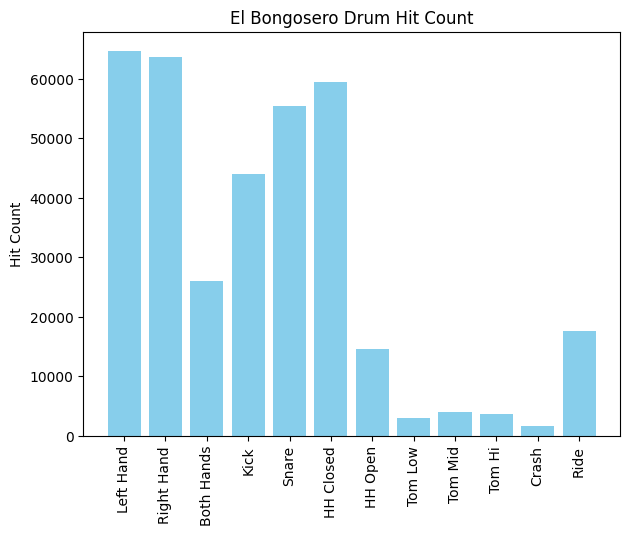

In [9]:
import matplotlib.pyplot as plt

# After your counting loop
labels_all = ['Left Hand', 'Right Hand', 'Both Hands', 'Kick', 'Snare', 'HH Closed', 'HH Open', 'Tom Low', 'Tom Mid', 'Tom Hi', 'Crash', 'Ride']
values_all = [left_hand_all, right_hand_all, both_all, kick_all, snare_all, hh_closed_all, hh_open_all, tom_low_all, tom_mid_all, tom_hi_all, crash_all, ride_all]

plt.bar(labels_all, values_all, color=['skyblue'])
plt.title('El Bongosero Drum Hit Count')
plt.ylabel('Hit Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [10]:
left_hand_merge = 0
right_hand_merge = 0
both_merge = 0
kick_merge = 0
snare_merge = 0
hh_merge = 0
tom_merge = 0
cymbal_merge = 0
for user in collection:
    for attempt in user.attempts:
        hvo_full = attempt.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
        
        for i in range(len(hvo.hvo)):
            if(hvo_full.hvo[i][0] == 1):
                left_hand_merge += 1
            if(hvo_full.hvo[i][1] == 1):
                right_hand_merge += 1
            if(hvo_full.hvo[i][0] == 1 and hvo_full.hvo[i][1] == 1):
                both_merge += 1
            if(hvo_full.hvo[i][2] == 1):
                kick_merge += 1
            if(hvo_full.hvo[i][3] == 1):
                snare_merge += 1
            if(hvo_full.hvo[i][4] == 1 or hvo_full.hvo[i][5] == 1):
                hh_merge += 1
            if(hvo_full.hvo[i][6] == 1 or hvo_full.hvo[i][7] == 1 or hvo_full.hvo[i][8] == 1):
                tom_merge += 1
            if(hvo_full.hvo[i][9] == 1 or hvo_full.hvo[i][10] == 1):
                cymbal_merge += 1

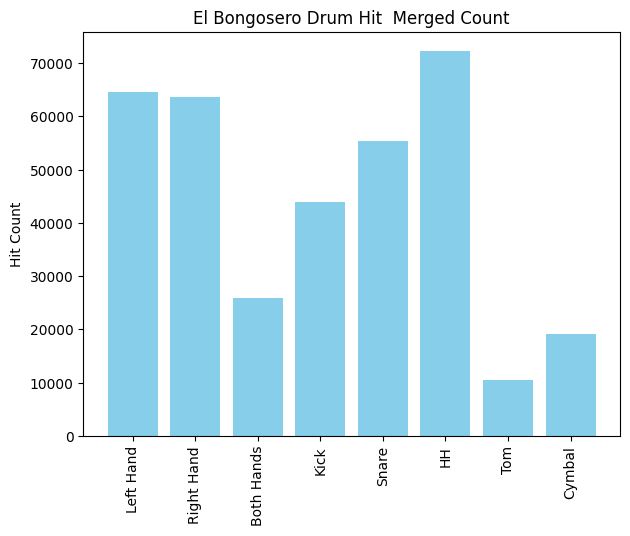

In [11]:
import matplotlib.pyplot as plt

# After your counting loop
labels_merge = ['Left Hand', 'Right Hand', 'Both Hands', 'Kick', 'Snare', 'HH', 'Tom', 'Cymbal']
values_merge = [left_hand_merge, right_hand_merge, both_merge, kick_merge, snare_merge, hh_merge, tom_merge, cymbal_merge]

plt.bar(labels_merge, values_merge, color=['skyblue'])
plt.title('El Bongosero Drum Hit  Merged Count')
plt.ylabel('Hit Count')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [9]:
hs_bongo = attempt_1.load_bongo_loop_hvo_seq()
hs_bongo.hvo

array([[ 0.        ,  1.        ,  0.        ,  0.4015748 ,  0.        ,
         0.405     ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.71653543,  0.        ,
        -0.072     ],
       [ 1.        ,  1.        ,  0.74015748,  0.76377953, -0.154     ,
        -0.083     ],
       [ 1.        ,  1.        ,  0.60629921,  0.7480315 ,  0.124     ,
         0.087     ],
       [ 0.        ,  1.        ,  0.        ,  0.28346457,  0.        ,
        -0.211     ],
       [ 0.        ,  1.        ,  0.        ,  0.76377953,  0.        ,
        -0.175     ],
       [ 1.        ,  1.        ,  0.71653543,  0.83464567, -0.261     ,
        -0.046     ],
       [ 1.        ,  1.        ,  0.23622047,  0.75590551, -0.279     ,
        -0.1       ],
       [ 0.        ,  1.        ,  0.        ,  0.64566929,  0.        ,
        -0.366     ],
       [ 1.        ,  1.        ,  0.12598425,  0.

In [26]:
hs_drums_and_bongo = attempt_1.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
#proll = hs_drums_and_bongo.piano_roll(show_figure=False, width=600, height=300)
#show(proll)
hs_drums_and_bongo.drum_mapping

'''
{'Left_Hand_Bongo': [64], --> voice 0
 'Right_Hand_Bongo': [63], --> voice 1
 'KICK': [36, 35], --> voice 2
 'SNARE': [38, 37, 40, 39],
 'HH_CLOSED': [42, 22, 44],
 'HH_OPEN': [46, 26],
 'TOM_3_LO': [43, 58, 41],
 'TOM_2_MID': [47, 45],
 'TOM_1_HI': [50, 48],
 'CRASH': [49, 52, 55, 57],
 'RIDE': [51, 53, 59]}
'''

"\n{'Left_Hand_Bongo': [64], --> voice 0\n 'Right_Hand_Bongo': [63], --> voice 1\n 'KICK': [36, 35], --> voice 2\n 'SNARE': [38, 37, 40, 39],\n 'HH_CLOSED': [42, 22, 44],\n 'HH_OPEN': [46, 26],\n 'TOM_3_LO': [43, 58, 41],\n 'TOM_2_MID': [47, 45],\n 'TOM_1_HI': [50, 48],\n 'CRASH': [49, 52, 55, 57],\n 'RIDE': [51, 53, 59]}\n"

In [20]:
both = 0
for i in range(len(hs_drums_and_bongo.hvo)):
    print(hs_drums_and_bongo.hvo[i])
    if(hs_drums_and_bongo.hvo[i][0] == 1 and hs_drums_and_bongo.hvo[i][1] == 1):
        both += 1
print(both)
print(hs_drums_and_bongo.hvo.shape)

[0.        1.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.4015748 0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.405     0.        0.        0.        0.
 0.        0.        0.        0.        0.       ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.71653543  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.072
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
[ 1.          1.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.74015748
  0.76377953  0.          0.65354331  0.          0.          0.
  0.          0.     

In [36]:
len(hs_drums_and_bongo.hvo)
hs_drums_and_bongo.hits.shape

(32, 11)

In [ ]:
# {'Left_Hand_Bongo': [64], --> voice 0
#  'Right_Hand_Bongo': [63], --> voice 1
#  'KICK': [36, 35], --> voice 2
#  'SNARE': [38, 37, 40, 39], --> 3
#  'HH_CLOSED': [42, 22, 44], --> 4
#  'HH_OPEN': [46, 26],
#  'TOM_3_LO': [43, 58, 41], --> 6
#  'TOM_2_MID': [47, 45], --> 7
#  'TOM_1_HI': [50, 48], --> 8
#  'CRASH': [49, 52, 55, 57],
#  'RIDE': [51, 53, 59]}

# -------------------------------------------------------------------
# -----------           ADD META DATA                  --------------
# -------------------------------------------------------------------
from hvo_sequence.custom_dtypes import Metadata
metadata_first_bar = Metadata({
    'title': 'My first score',
    'style': 'Rock',
    'source': 'Dataset X'})
hvo_seq.metadata = metadata_first_bar

# Add additional metadata (Even with new information not in the first bar)
metadata_second_bar = Metadata({
    'title': 'My second score',
    'style': 'Pop',
    'source': 'Dataset Y',
    'human_performance': True})
hvo_seq.metadata.append(metadata_second_bar, start_at_time_step=16)

In [90]:
## Make code that takes in a list of lists
## allows user to select four pre-determined combinations - e.g. left, right, both, kick


# a_1_hvo = attempt_1.load_drums_with_bongos_hvo_sequence(drum_source='dataset_and_API/data/DrumSources')
# a_1_hvo.time_signatures
# a_1_hvo.tempos
def make_hvo_from_list(instrument_lists, attempt, dataset_dir, output_dir, attempt_num, user):
    #Check if output directory exists and create it if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    #create the subdirectory if it doesn't exist
    sub_dir = output_dir + '/' + str(user.user_id)
    if not os.path.exists(sub_dir):
        os.makedirs(sub_dir)

    for instrument_list in instrument_lists:
        print('user_id_' + str(user.user_id))
        print('attempt_num_' + str(attempt_num))
        print(instrument_list)
        print(attempt.user_level_of_musical_experience)
        print(attempt.user_exhibion_rating)
        #We set each voice to a Midi Mapping value for Drums
        FOUR_VOICES = {
            "voice_1": [36],
            "voice_2": [37],
            "voice_3": [38],
            "voice_4": [39]
        }

        #Create new HVO Sequence with beat division of 4 and set Drum Mapping to Four_Voices Mapping
        hvo_seq_four_voices = HVO_Sequence(
            beat_division_factors=[4],
            drum_mapping=FOUR_VOICES)
        
        
        #Add tempo of 120 BPM to the HVO sequence at time 0
        hvo_seq_four_voices.add_tempo(
            time_step=0,
            qpm=attempt.attempt_tempo
        )

        #Add a time signature of 4/4 for the HVO Sequence
        hvo_seq_four_voices.add_time_signature(
            time_step=0,
            numerator=4,
            denominator=4
        )

        #Create metadata for hvo
        metadata_first_bar = Metadata({
            'self_assesment': attempt.self_assessment,
            'genre': attempt.genre,
            'tempo': attempt.attempt_tempo,
            'experience': attempt.user_level_of_musical_experience,
            'instrument_order': instrument_list})
        
        #assign the metadata to the hvo
        hvo_seq_four_voices.metadata = metadata_first_bar

        #Load HVO from Bongosero Collection
        hvo = attempt.load_drums_with_bongos_hvo_sequence(drum_source=dataset_dir)

        #Set Four Voice HVO to all zeros
        hvo_seq_four_voices.zeros(len(hvo.hvo))
        
        #location variable to keep track of which of the 4 streams we are creating
        location = 0

        for name in instrument_list:
            if location > 4:
                raise ValueError("Only four instruments allowed in the list. This was meant to be handled elsewhere, but I messed up. Sorry! - J")
            if name.lower() == 'left':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][0]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][0]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][0]
            elif name.lower() == 'right':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][1]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][1]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][1]
            elif name.lower() == 'both':
                for i in range(len(hvo.hvo)):
                    if(hvo.hits[i][0] == 1 and hvo.hits[i][1] == 1):
                        hvo_seq_four_voices.hits[i][location] = 1
                        hvo_seq_four_voices.velocities[i][location] = max(hvo.velocities[i][0], hvo.velocities[i][1])
                        hvo_seq_four_voices.offsets[i][location] = max(hvo.offsets[i][0], hvo.offsets[i][1])
                    else:
                        hvo_seq_four_voices.hits[i][location] = 0
                        hvo_seq_four_voices.velocities[i][location] = 0
                        hvo_seq_four_voices.offsets[i][location] = 0
            elif name.lower() == 'kick':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][2]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][2]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][2]
            elif name.lower() == 'snare':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][3]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][3]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][3]
            elif name.lower() == 'hh_closed':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][4]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][4]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][4]
            elif name.lower() == 'hh_open':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][5]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][5]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][5]
            elif name.lower() == 'tom_lo':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][6]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][6]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][6]
            elif name.lower() == 'tom_mid':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][7]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][7]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][7]
            elif name.lower() == 'tom_hi':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][8]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][8]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][8]
            elif name.lower() == 'crash':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][9]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][9]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][9]
            elif name.lower() == 'ride':
                for i in range(len(hvo.hvo)):
                    hvo_seq_four_voices.hits[i][location] = hvo.hits[i][10]
                    hvo_seq_four_voices.velocities[i][location] = hvo.velocities[i][10]
                    hvo_seq_four_voices.offsets[i][location] = hvo.offsets[i][10]
            elif name.lower() == 'toms':
                for i in range(len(hvo.hvo)):
                    if(hvo.hits[i][6] == 1 or hvo.hits[i][7] == 1 or hvo.hits[i][8] == 1):
                        hvo_seq_four_voices.hits[i][location] = 1
                        hvo_seq_four_voices.velocities[i][location] = max(hvo.velocities[i][6], hvo.velocities[i][7], hvo.velocities[i][8])
                        hvo_seq_four_voices.offsets[i][location] = max(hvo.offsets[i][6], hvo.offsets[i][7], hvo.offsets[i][8])
            elif name.lower() == 'hihats':
                for i in range(len(hvo.hvo)):
                    if(hvo.hits[i][4] == 1 or hvo.hits[i][5] == 1):
                        hvo_seq_four_voices.hits[i][location] = 1
                        hvo_seq_four_voices.velocities[i][location] = max(hvo.velocities[i][4], hvo.velocities[i][5])
                        hvo_seq_four_voices.offsets[i][location] = max(hvo.offsets[i][4], hvo.offsets[i][5])
            elif name.lower() == 'cymbals':
                for i in range(len(hvo.hvo)):
                    if(hvo.hits[i][9] == 1 or hvo.hits[i][10] == 1):
                        hvo_seq_four_voices.hits[i][location] = 1
                        hvo_seq_four_voices.velocities[i][location] = max(hvo.velocities[i][9], hvo.velocities[i][10])
                        hvo_seq_four_voices.offsets[i][location] = max(hvo.offsets[i][9], hvo.offsets[i][10])
            else:
                raise ValueError('Incorrect name given. Please look at readme for correct names to use.')
            
            #Update the location of the hvo sequence
            location += 1
            
            #Save hvo sequence
            name = '_'.join(instrument_list)
            full_name = str(user.user_id) + '_attempt_num_' + str(attempt_num) + '_' + name + '.hvo'
            hvo_seq_four_voices.save(sub_dir + '/' + full_name)

def move_through_collection(dataset_dir, output_dir, expert_level, rating, instrument_lists):
    #collection = BongoDrumCollection('dataset_and_API/data/SavedSessions.bz2')
    collection = BongoDrumCollection(dataset_dir + '/SavedSessions.bz2')
    for user in collection[:10]:
        print('user')
        print(user)
        attempt_num = 0
        for attempt in user:
            if(attempt.user_level_of_musical_experience >= expert_level and attempt.user_exhibion_rating >= rating):
                make_hvo_from_list(instrument_lists, attempt, dataset_dir, output_dir, attempt_num, user)
            attempt_num += 1
    

In [91]:
list_of_test_instruments = [['left', 'right', 'both', 'kick'], ['left', 'right', 'snare', 'kick'], ['left', 'right', 'toms', 'kick']]
move_through_collection('dataset_and_API/data', 'bongosero', 2, 2, list_of_test_instruments)

user
----------------------------------------
User ID: 3119
Number of attempts: 3
User Level of Musical Experience: 5
User Exhibition Rating: 5
Attempt 1:
{'attempt_duration': 9.0, 'self_assessment': 1, 'assessment_time': 12.0, 'attempt_tempo': 122.0, 'drum_path': 'Afrocuban/p0000003354__m001__beat__afrocuban__066---068.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00003119--2023-11-29--14-11-34/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 5}
Attempt 2:
{'attempt_duration': 12.0, 'self_assessment': 5, 'assessment_time': 13.0, 'attempt_tempo': 120.0, 'drum_path': 'Electronic/249_chicago_jackyourbody16.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00003119--2023-11-29--14-11-34/Part2_BongosAlonWithDrums/attempt_003/groove_metadata.json', 'genre': 'Electronic', 'user_level_of_musical_experience': 5, 'user_exhibion_rating

In [92]:
from hvo_sequence import io_helpers
hvo_loaded_test = io_helpers.load_HVO_Sequence_from_file('bongosero/1463/1463_attempt_num_0_left_right_both_kick.hvo')
#hvo_loaded_test_2 = io_helpers.load_HVO_Sequence_from_file('bongosero/0/0_left_right_snare_kick.hvo')
#hvo_loaded_test_3 = io_helpers.load_HVO_Sequence_from_file('bongosero/1/1_left_right_snare_kick.hvo')

In [93]:
print(hvo_loaded_test.metadata)
print(hvo_loaded_test.hvo)
#print(hvo_loaded_test_2.metadata)
#print(hvo_loaded_test_3.metadata)

{'self_assesment': 3, 'genre': 'Disco', 'tempo': 120.0, 'experience': 2, 'instrument_order': ['left', 'right', 'both', 'kick']}
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.59055118
   0.          0.          0.          0.058       0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          1.          0.          1.          0.          0.61417323
   0.          0.4488189   0.         -0.142       0.          0.018     ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.     

{'attempt_duration': 18.0, 'self_assessment': 1, 'assessment_time': 22.0, 'attempt_tempo': 110.0, 'drum_path': 'Afrocuban/p0000003389__m001__beat__afrocuban__028---030.mid', 'metadata_json': 'dataset_and_API/data/SavedSessions/SavedSessions/session_00005364--2023-12-27--17-48-34/Part2_BongosAlonWithDrums/attempt_001/groove_metadata.json', 'genre': 'Afrocuban', 'user_level_of_musical_experience': 5, 'user_exhibion_rating': 3}
